**Introduction and Problem Statement**

In the healthcare sector, understanding the factors that influence insurance claim amounts is crucial for insurance providers to assess risk and design suitable policies. This project aims to build a machine learning model that predicts individual medical insurance charges based on demographic and health-related features such as age, BMI, smoking status, and region.

By accurately predicting charges, insurance companies can:

- Offer more customized insurance packages.

- Mitigate potential losses.

- Promote transparency in premium calculations.

**Dataset Understanding and Description**

We use the Medical Cost Personal Dataset, which contains more than 1000 records of patients with the following features:

**Column and Description**
- age	             - Age of the policyholder
- sex	             - Gender (male/female)
- children       	 - Number of dependents covered by insurance
- smoker	         - Smoking status (yes/no)
- region	         - Residential region in the US (northeast, northwest, etc.)
- charges	         - Target variable: individual medical costs billed by health insurance

The goal is to use these input variables to predict the charges, a regression problem.

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# 2. Load the dataset
df = pd.read_csv('/kaggle/input/insurance/Insurance.csv')  
print(df.head())
print(df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
 #Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True) 

In [4]:
# 5. Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [5]:
# 6. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 7. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# 8. Make predictions on test set
y_pred = model.predict(X_test)


In [8]:
# 9. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.7836


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


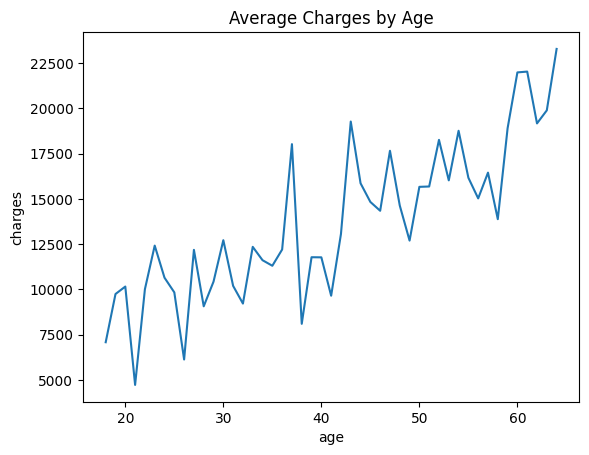

In [9]:
# Average charges by age
age_avg = df.groupby('age')['charges'].mean().reset_index()
sns.lineplot(x='age', y='charges', data=age_avg)
plt.title('Average Charges by Age')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


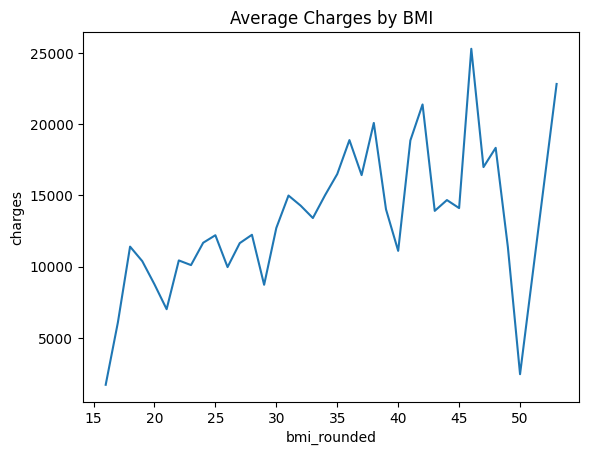

In [10]:
# Average charges by BMI (rounded for grouping)
df['bmi_rounded'] = df['bmi'].round()
bmi_avg = df.groupby('bmi_rounded')['charges'].mean().reset_index()
sns.lineplot(x='bmi_rounded', y='charges', data=bmi_avg)
plt.title('Average Charges by BMI')
plt.show()

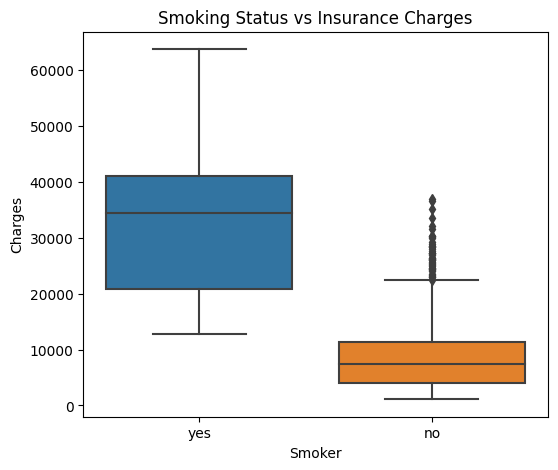

In [11]:

# c) Smoker vs Charges (boxplot)
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoking Status vs Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()